In [ ]:
import numpy as np
from scipy.integrate import *
import matplotlib.pyplot as plt
from subrotina1 import *

# Estruturação do Código

No arquivo "subrotina1.py", escreva a função da derivada. Chamamos essa função de "der(t,u,par)", onde u é um vetor das entradas do sistema e par é um vetor de parâmetros para a função. Essa função retorna a derivada das entradas.

O Código está estruturado de forma que, alterando a função "der(t,u,par)" na sub-rotina, basta alterar os argumentos e parâmetros neste código, não sendo necessário ter que programar novamente o código inteiro caso a função seja alterada.

In [ ]:
t0 = 0 #tempo inicial

tf = 8 #tempo final

args = [1.5,1,1,3] #parâmetros

y0 = [10,5] #condição inicial

ts = np.linspace(t0,tf,num=300)

sol = solve_ivp(der, [t0,tf], y0, t_eval = ts, dense_output = True, args = [args]) #usando scipy para integrar o sistema

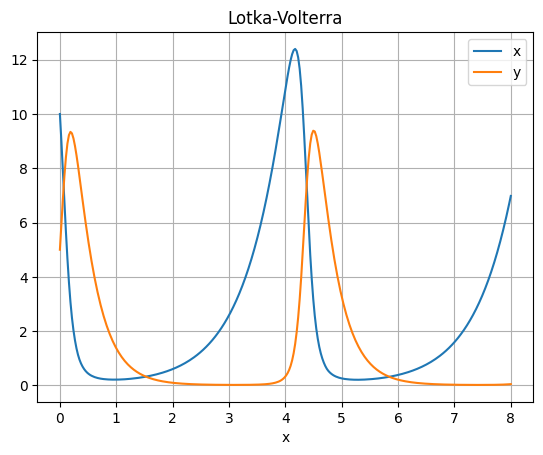

In [ ]:
plt.plot(ts,sol.y.T)
plt.xlabel('x')
plt.title("Lotka-Volterra")
plt.legend(['x','y'])
plt.grid(True)
plt.show()

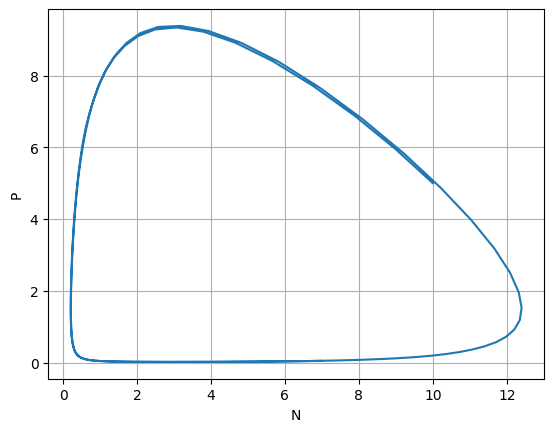

In [ ]:
plt.plot(sol.y[0],sol.y[1])
plt.grid(True)
plt.xlabel('N')
plt.ylabel('P')
plt.show()

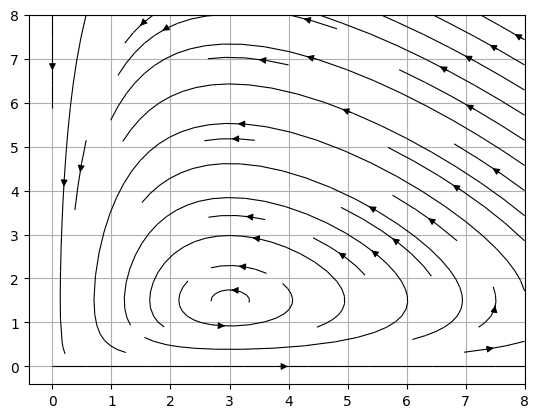

In [ ]:
X,Y = np.meshgrid(np.linspace(t0,tf,num=300),np.linspace(t0,tf,num=300))

U,V = der(0,[X,Y],args)

plt.streamplot(X,Y,U,V, density = 0.5, linewidth = 0.8, color = 'black')
plt.grid(True)
plt.show()

# Modelo 1

$$  \frac{d N}{d t} = rN - c NP $$

<br>

$$  \frac{d P}{d t} = bNP - m P $$




### Funções auxiliares para plotar gráficos

In [ ]:
def graph_x_y(sols, colors, par_var = 'r', lgnd = ['N', 'P']):
  #sols -> lista que contém como elementos as soluções do sistema ao mudarmos os parametros
  #colors -> lista com string de cores
  #lgnd -> legenda que iremos colocar em cada eixo do graph
  #par_var -> parâmetro que iremos variar ao longo das questões

  plt.figure(figsize=(20,7))
  for idx, sol in enumerate(sols):
    plt.subplot(1,len(sols), idx+1)
    plt.plot(sol.y[0],sol.y[1], color = colors[idx])
    plt.xlabel(lgnd[0])
    plt.ylabel(lgnd[1])
    plt.title(par_var + str(idx+1))
    plt.grid(True)

def graph_camp_vec(list_args, ts, colors, der, par_var = 'r', lgnd = ['N', 'P']):
  #list_args -> lista que contém como elementos os argumentos do sistema linear
  # ts = np.linspace(t0,tf, num = n)
  #colors -> lista com string de cores
  #par_var -> parâmetro que iremos variar ao longo das questões
  #lgnd -> legenda que iremos colocar em cada eixo do graph

  X,Y = np.meshgrid(ts,ts)

  plt.figure(figsize=(20,7))

  for idx, args in enumerate(list_args):
    U,V = der(0,[X,Y],args)

    plt.subplot(1,len(sols), idx+1)

    plt.streamplot(X,Y,U,V, density = 0.5, linewidth = 0.8, color = colors[idx])
    plt.xlabel(lgnd[0])
    plt.ylabel(lgnd[1])
    plt.title(par_var + str(idx+1))
    plt.grid(True)

def graph_qntd_ts(sols, ts, lgnd = ['N', 'P']):
  #list_args -> lista que contém como elementos os argumentos do sistema linear
  # ts = np.linspace(t0,tf, num = n)
  # lgnd -> legenda

  plt.figure(figsize=(20,7))

  for idx, sol in enumerate(sols):
    plt.subplot(1, len(sols), idx+1)
    plt.plot(ts,sol.y.T)
    plt.xlabel('Tempo')
    plt.ylabel('Quantidade')
    plt.legend(lgnd)
    plt.grid(True)

1- Considere o modelo ($1$) e utilizando o programa em
Python providenciado com a subrotina1.py estudar a
dependência dos parâmetros (todos > 0).

<br />


1.a) Fixe os parâmetros $c$, $b$, $m$: o que acontece ao mudar do parâmetro $r$ ?
<br />



In [ ]:
t0 = 0 #tempo inicial
tf = 8 #tempo final

r, c, b, m = 1.5, 1, 1, 3

args_r1 = [1,c,b,m] #parâmetros r, c, b, m
args_r2 = [2,c,b,m]
args_r3 = [5,c,b,m]

y0 = [10,5] #condição inicial N,P

ts = np.linspace(t0,tf,num=300)

sol_r1 = solve_ivp(der, [t0,tf], y0, t_eval = ts, dense_output = True, args = [args_r1])
sol_r2 = solve_ivp(der, [t0,tf], y0, t_eval = ts, dense_output = True, args = [args_r2])
sol_r3 = solve_ivp(der, [t0,tf], y0, t_eval = ts, dense_output = True, args = [args_r3])

In [ ]:
sols = [ sol_r1, sol_r2, sol_r3]
list_args_r = [ args_r1, args_r2, args_r3]
colors = ['red', 'green', 'black']

- Como variam os pontos fixos?


Sabemos que os pontos fixos para a resolução desse modelo são: (cálculo feito a parte)

<br>

$ P = \frac{r}{c} $ e $ N = 0 $

<br>

ou

<br>

$ N = \frac{m}{b} $ e $ P=0 $


Ao mudarmos o parâmetro $ r $, mudamos o ponto fixo $ P = \frac{r}{c}$ e as orbitas do sistema de EDO

- Como muda o campo de direções e as correspondentes
orbitas?

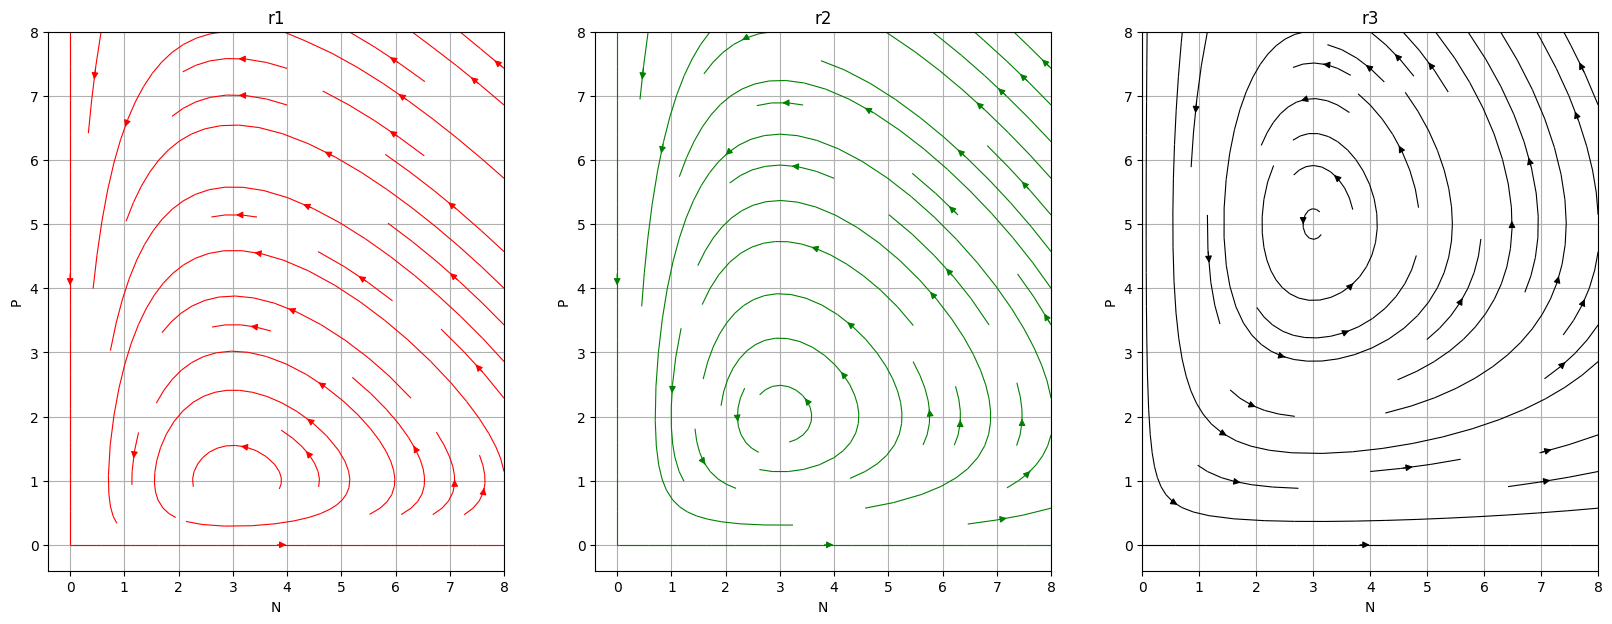

In [ ]:
graph_camp_vec(list_args_r, ts, colors, der)

As mudanças no campo são ao redor da convergência nos pontos fixos e isso varia de acordo com $r$ e $c$, mas nesse caso o $c$ está fixo


- Como variam as duas populações com o tempo?
Qual é a sua interpretação?

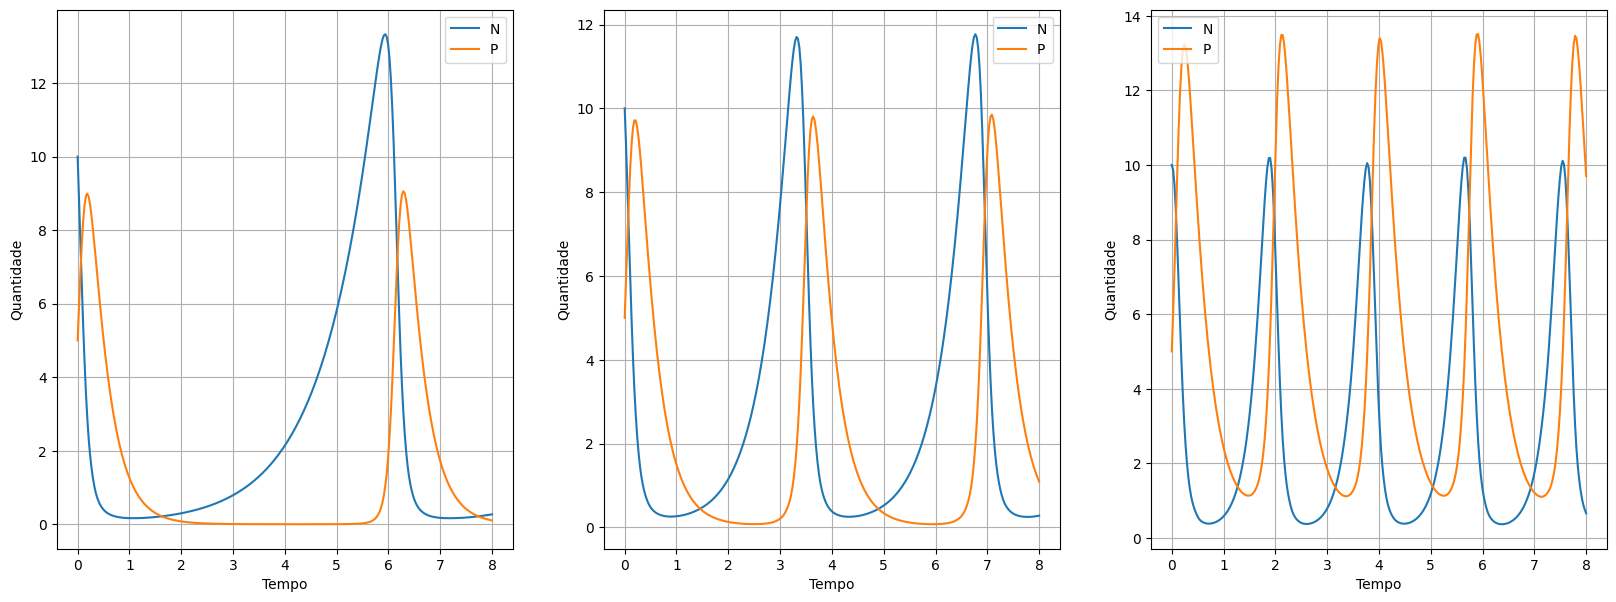

In [ ]:
graph_qntd_ts(sols,ts)

No 1 gráfico para $r =1$, temos que em algum momento a população de $P$ é extinta.

Nos gráficos 2 e 3 existe uma sazonalidade na quantidade populacional de $N$ e $P$

1.b) Fixe os parâmetros $r$, $c$, $m$: o que acontece ao mudar do parâmetro $b$ ?

In [ ]:
args_b1 = [r,c,1,m] #parâmetros r, c, b, m
args_b2 = [r,c,2,m]
args_b3 = [r,c,8,m]

sol_b1 = solve_ivp(der, [t0,tf], y0, t_eval = ts, dense_output = True, args = [args_b1])
sol_b2 = solve_ivp(der, [t0,tf], y0, t_eval = ts, dense_output = True, args = [args_b2])
sol_b3 = solve_ivp(der, [t0,tf], y0, t_eval = ts, dense_output = True, args = [args_b3])

In [ ]:
sols = [ sol_b1, sol_b2, sol_b3]
list_args_b = [ args_b1, args_b2, args_b3]

- Como variam os pontos fixos?

Ao mudarmos o parâmetro $ b $, mudamos o ponto fixo $ N = \frac{m}{b}$ e as orbitas do sistema de EDO

- Como muda o campo de direções e as correspondentes orbitas?


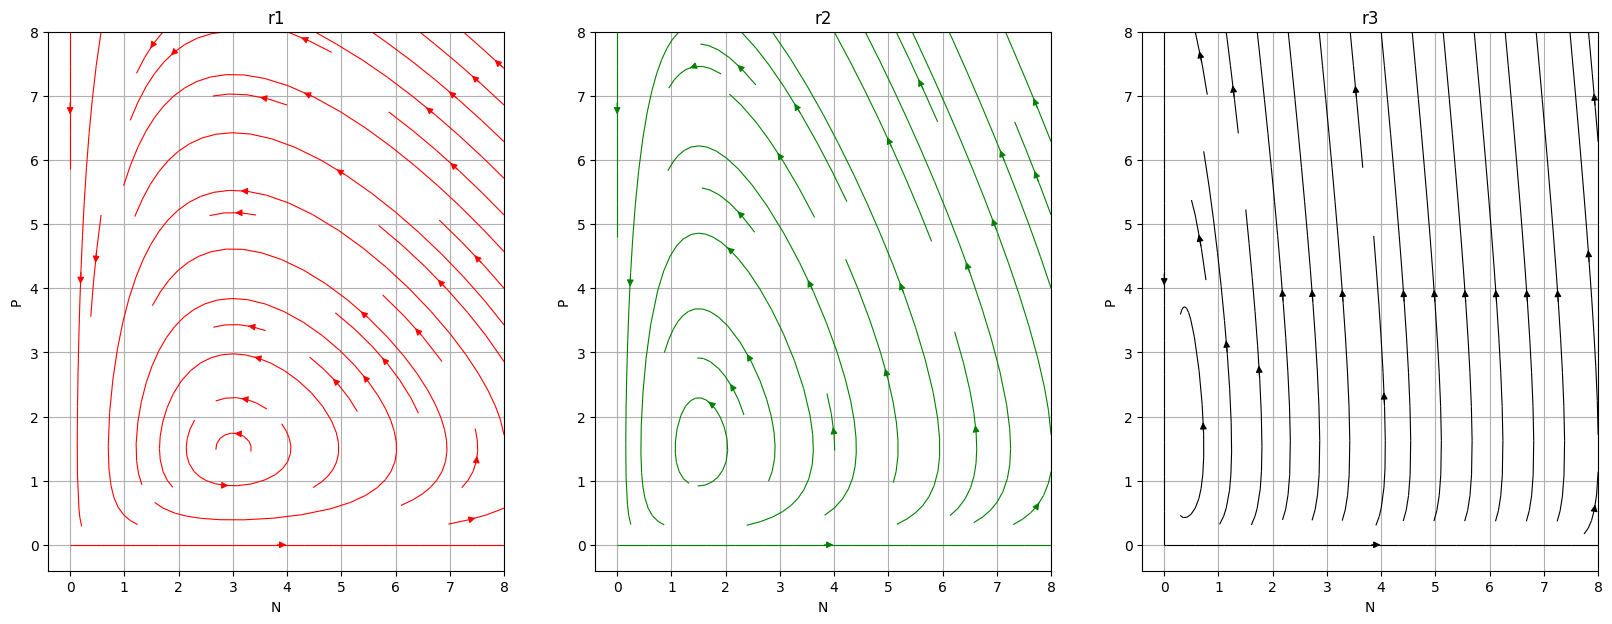

In [ ]:
graph_camp_vec(list_args_b, ts, colors, der)

As mudanças no campo são ao redor da convergência nos pontos fixos e isso varia de acordo com $b$ e $m$, mas nesse caso o $m$ está fixo

- Como variam as duas populações com o tempo?
Qual é a sua interpretação?

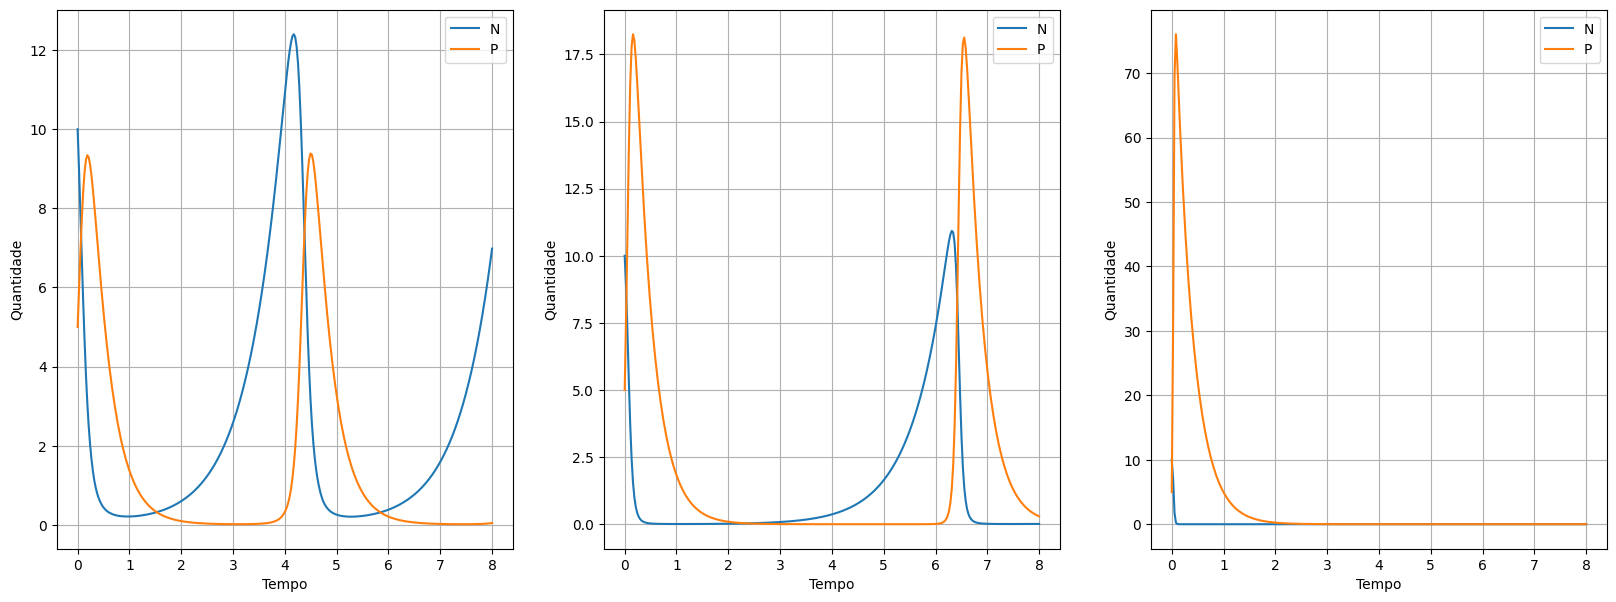

In [ ]:
graph_qntd_ts(sols, ts)

No gráfico 1 a população de  $P$ fica extinta, enquanto nos outros 2 gráficos em determinado momento ambas as populações $N$ e $P$ são extintas

1.C) Implemente o modelo considerando a pesca, tanto de presas quanto de predadores.

Considere o termo de pesca proporcional a população de cada espécie (h> 0).

<br>

$$  \frac{d N}{d t} = (r-h)N - c NP $$

<br>

$$  \frac{d P}{d t} = bNP - (m+h) P $$

<br>



In [ ]:
args_h1 = [r, c, b, m, 0.1]
args_h2 = [r, c, b, m, 1]
args_h3 = [r, c, b, m, 10]

sol_h1 = solve_ivp(der_2, [t0,tf], y0, t_eval = ts, dense_output = True, args = [args_h1])
sol_h2 = solve_ivp(der_2, [t0,tf], y0, t_eval = ts, dense_output = True, args = [args_h2])
sol_h3 = solve_ivp(der_2, [t0,tf], y0, t_eval = ts, dense_output = True, args = [args_h3])

In [ ]:
sols = [ sol_h1, sol_h2, sol_h3]
list_args_h = [ args_h1, args_h2, args_h3]

O que acontece às duas populações ao variar do parâmetro h? Quantos diferentes casos pode distinguir?

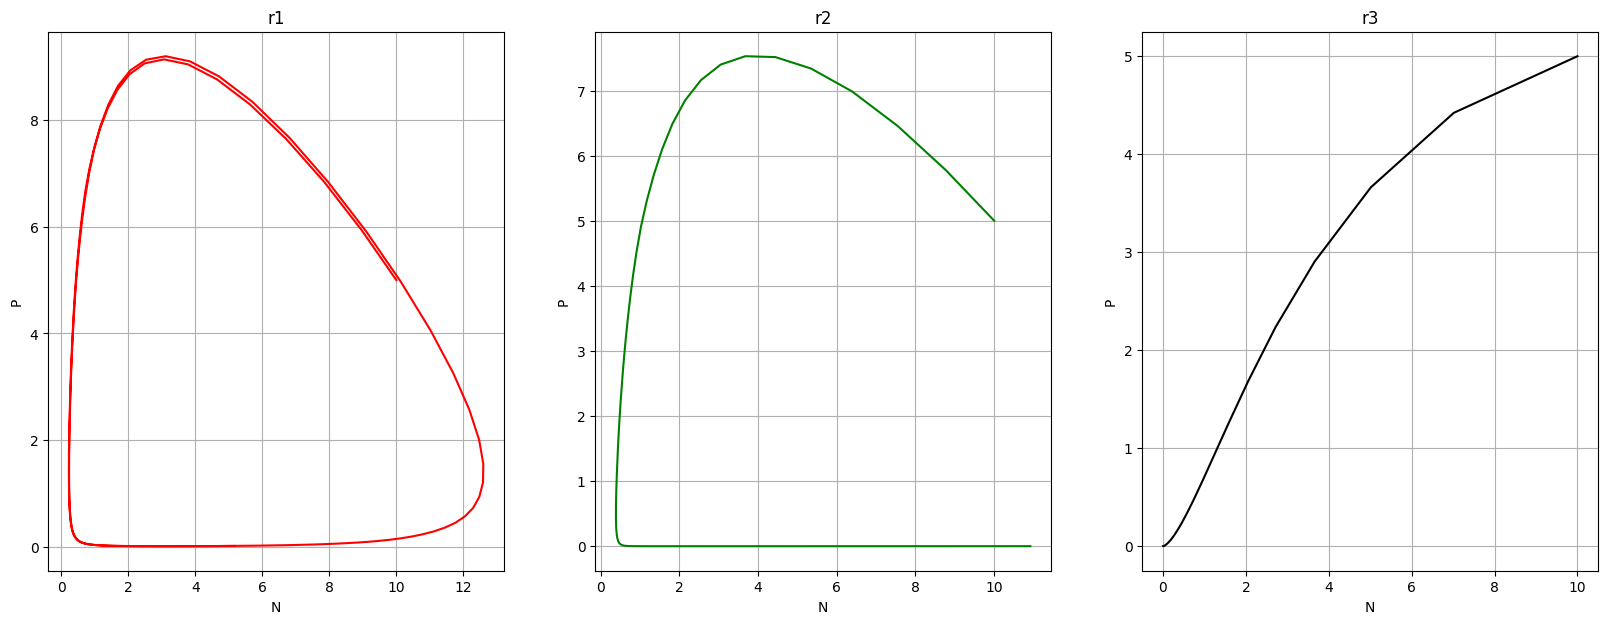

In [ ]:
graph_x_y(sols, colors)

## Considere a competição entre presas :

<br>

$$  \frac{d N}{d T} = rN \cdot \left(1 - \frac{N}{K} \right) - c NP $$

<br>

$$  \frac{d P}{d T} = bNP - m P $$

<br>


2.a) Fixe os parâmetros $c$ , $b$, $m$ à zero, e $r$ e $K$ diferentes de zero.

O que acontece à trajetória da solução $N(t)$ ao mudar da condição inicial ? Considere valores de $N(0) < K, =K, > K$

Achando os pontos fixos:

$$  \frac{d N}{d T} = 0$$

<br>

$$   N \cdot \left(r - \frac{rN}{K} - c P \right) = 0   $$

<br>

Então, $ N = 0$ ou :

<br>

$$ N = \frac{(r - cp) \cdot k}{r} $$

Dessa forma, fixando c, b, m a zero, temos :

$$ N = k $$

Ao mudarmos as condições iniciais de $N(t)$, ao longo do tempo a trajetória vai tender ao valor de $ N(t) = k$ que é o ponto fixo, isso pode ser observado nos gráficos abaixo

In [ ]:
K = 2
args_k = [r, 0, 0, 0, K]

y0_k = [1,5] #condição inicial N,P
y1_k = [2,5]
y2_k = [8,5]

sol_0_k = solve_ivp(der_3, [t0,tf], y0_k, t_eval = ts, dense_output = True, args = [args_k])
sol_1_k = solve_ivp(der_3, [t0,tf], y1_k, t_eval = ts, dense_output = True, args = [args_k])
sol_2_k = solve_ivp(der_3, [t0,tf], y2_k, t_eval = ts, dense_output = True, args = [args_k])

In [ ]:
sols = [sol_0_k, sol_1_k, sol_2_k]

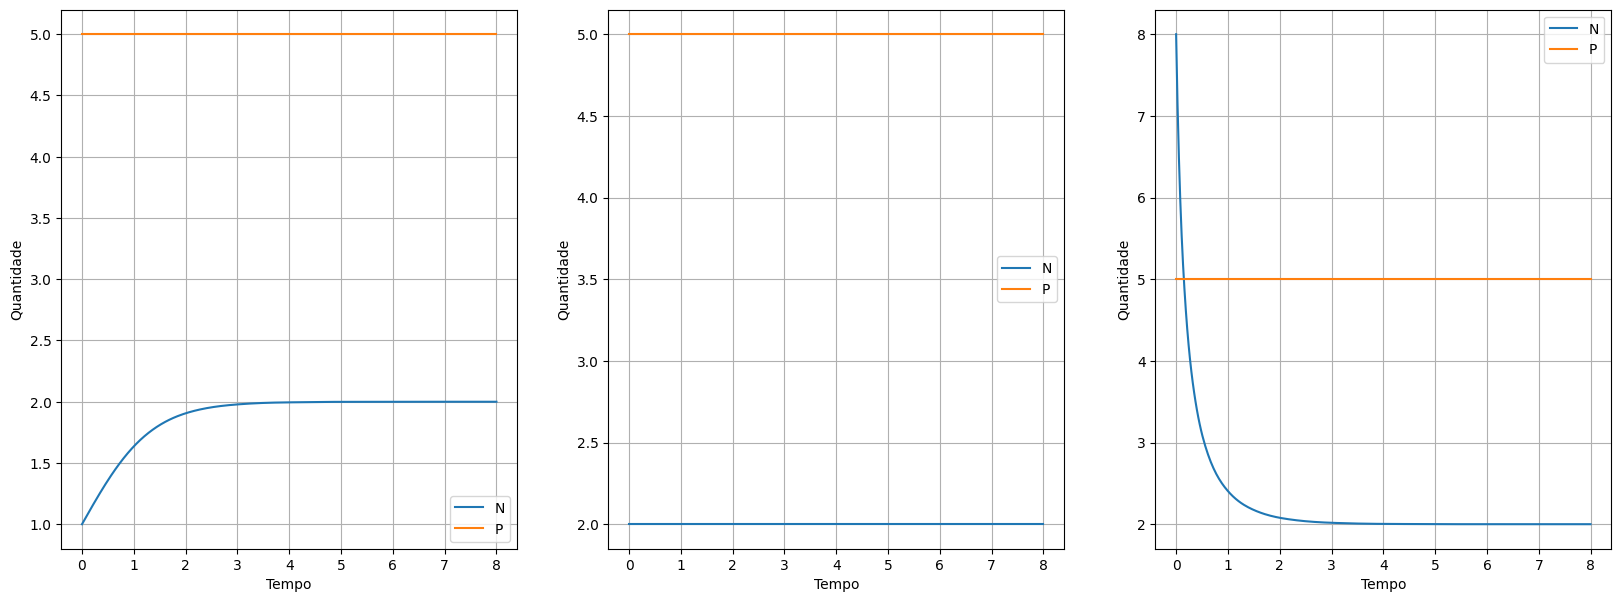

In [ ]:
graph_qntd_ts(sols, ts)

2.b) Fixe os parâmetros $r$, $c$, $b$, $m$ diferentes de zero e varie o
parametro $K$.



In [ ]:
args_k1 = [r, c, b, m, 0.1]
args_k2 = [r, c, b, m, 1]
args_k3 = [r, c, b, m, 10]

sol_k1 = solve_ivp(der_3, [t0,tf], y0, t_eval = ts, dense_output = True, args = [args_k1])
sol_k2 = solve_ivp(der_3, [t0,tf], y0, t_eval = ts, dense_output = True, args = [args_k2])
sol_k3 = solve_ivp(der_3, [t0,tf], y0, t_eval = ts, dense_output = True, args = [args_k3])

In [ ]:
sols = [ sol_k1, sol_k2, sol_k3]
list_args_k = [ args_k1, args_k2, args_k3]

- Como variam os pontos fixos?


Os pontos fixos são: $ N = 0$ ou $ N = \frac{(r - cp) \cdot k}{r} $ (cálculo feito acima)



- Como muda o campo de direções e as correspondentes orbitas?


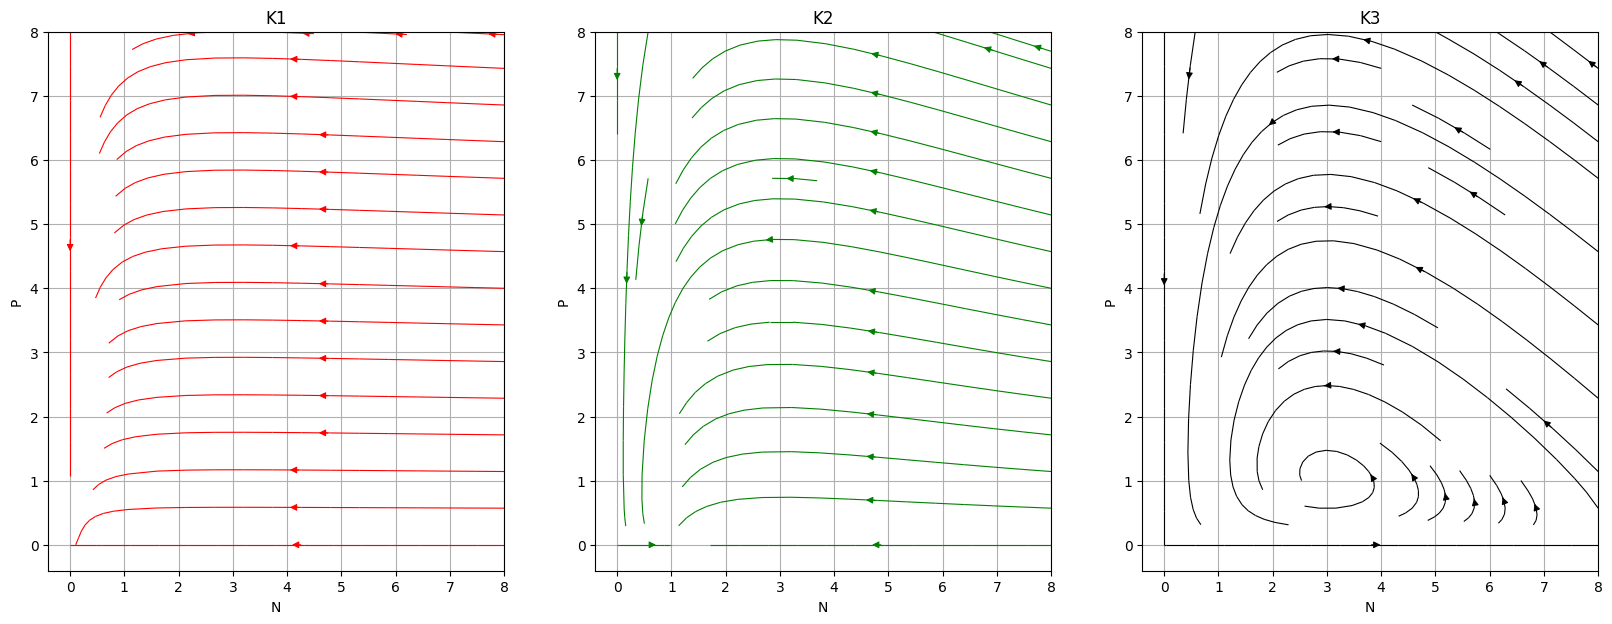

In [ ]:
graph_camp_vec(list_args_k, ts, colors, der_3, par_var = 'K' )

- Como variam as duas populações com o tempo?



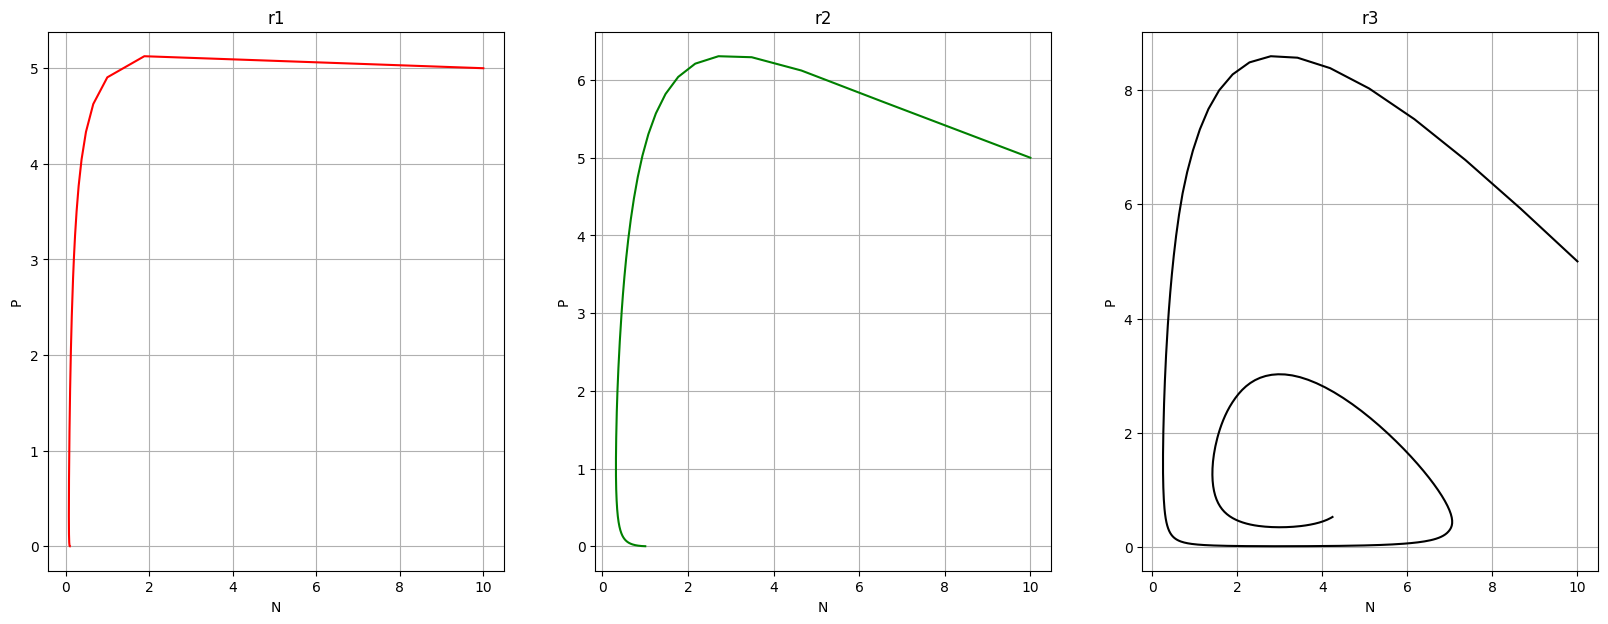

In [ ]:
graph_x_y(sols, colors)

Qual é a sua interpretação do impacto da competição entre
presas ? Algunas aplicações às situações reais?

## Equações Adimensionais

### Considere as equações

<br>

$$  \frac{d x}{d T} = x (1 - x - y) $$

<br>

$$  \frac{d y}{d T} = \beta (x - \alpha)y $$

<br>

3.1) Fixe o parâmetro $ \beta $ diferente de zero e varie o parâmetro $\alpha$ .

In [ ]:
alfa, beta = 1.5, 2.3

args_a1 = [0.1, beta]
args_a2 = [1.5, beta]
args_a3 = [5.1, beta]

sol_a1 = solve_ivp(der_adm, [t0,tf], y0, t_eval = ts, dense_output = True, args = [args_a1])
sol_a2 = solve_ivp(der_adm, [t0,tf], y0, t_eval = ts, dense_output = True, args = [args_a2])
sol_a3 = solve_ivp(der_adm, [t0,tf], y0, t_eval = ts, dense_output = True, args = [args_a3])

In [ ]:
sols = [ sol_a1, sol_a2, sol_a3]
list_args_a = [ args_a1, args_a2, args_a3]

- Como variam os pontos fixos?


Calculando os pontos fixos:

$$ x(1-x-y) = 0 $$

<br>

$x = 0$ ou $ x+y = 1 $

<br>

e também:

$$ \beta y (x - \alpha) = 0 $$

<br>

$ y = 0$ ou $ x = \alpha$


- Como muda o campo de direções e as correspondentes orbitas?



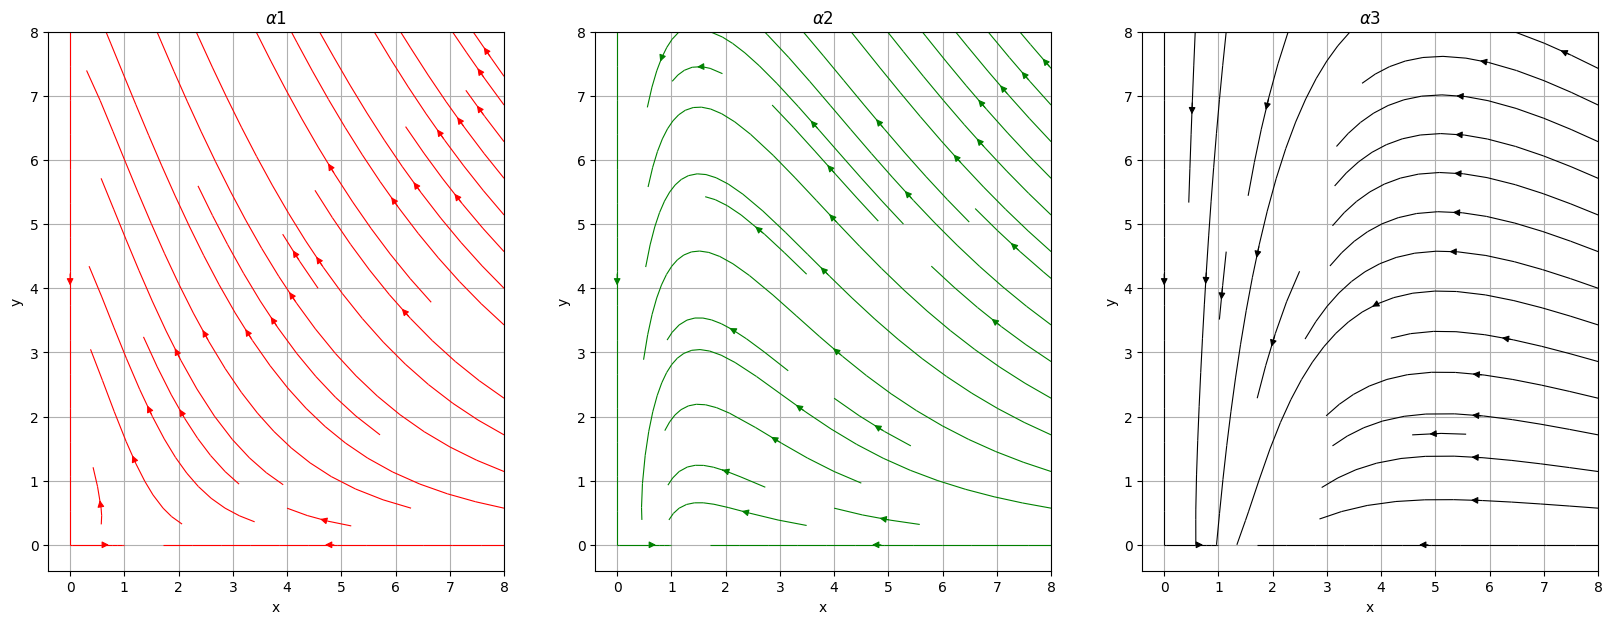

In [ ]:
graph_camp_vec(list_args_a, ts, colors, der_adm, par_var = '$\\alpha$', lgnd = ['x', 'y'])

- Como variam as duas populações com o tempo?


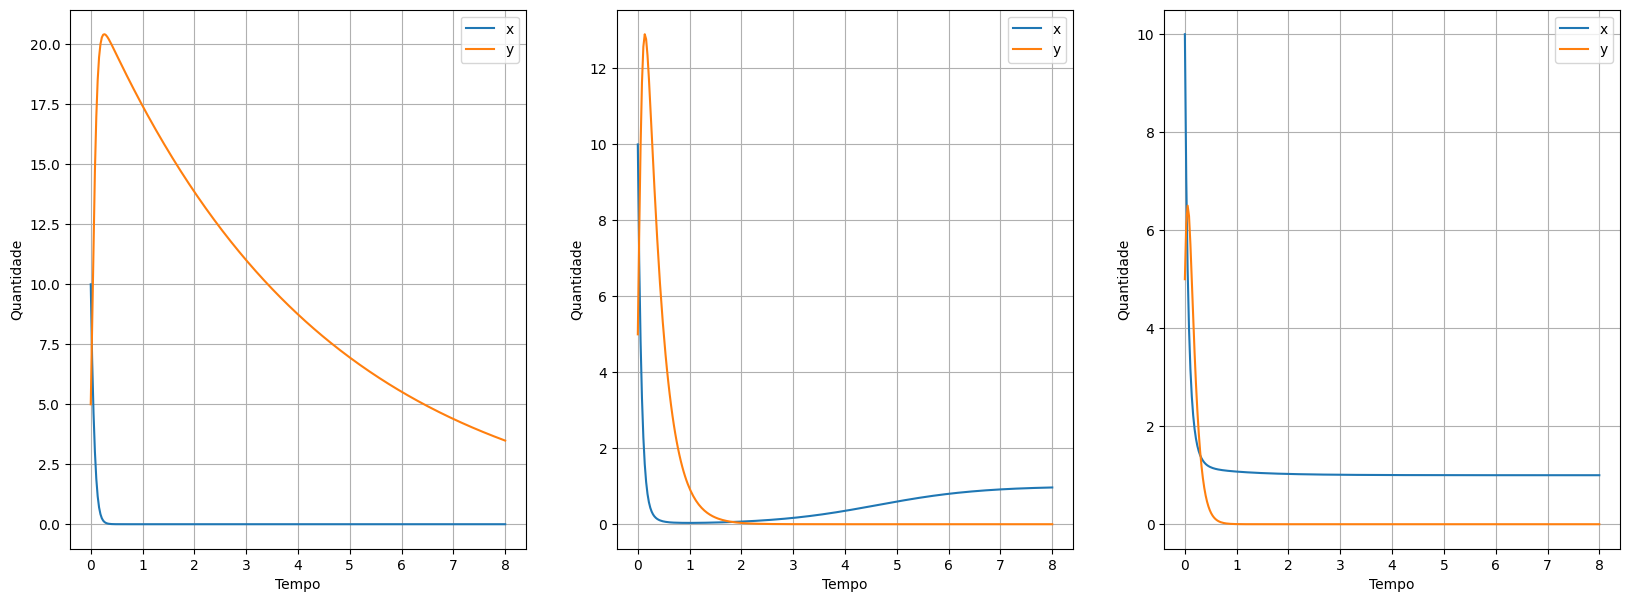

In [ ]:
graph_qntd_ts(sols, ts, lgnd = ['x', 'y'])

- Como mudam a propriedade de estabilidade dos pontos fixos
ao variar do parâmetro $ \alpha $ ?



Quantos diferentes casos consegue distinguir?

<br>

Detalhe os valores dos parâmetros usados nas suas simulações.

## Ciclos Limites

### Considere o sistema de equações

$$  \frac{d}{dt} \begin{pmatrix} x_{1} \\ x_{2} \end{pmatrix} =  \begin{pmatrix} \beta & - \omega  \\ \omega & \beta \end{pmatrix} \begin{pmatrix} x_{1} \\ x_{2} \end{pmatrix} + (x_{1}^{2} + x_{2}^{2}) \begin{pmatrix} a & -b  \\ b & a \end{pmatrix} \begin{pmatrix} x_{1} \\ x_{2} \end{pmatrix}  $$

A mudança de variáveis (coordenadas polares):

$$ x_{1} = r cos(\theta)$$

$$ x_{2} = r sin(\theta) $$

<br>

Transforma o sistema acima em:


$$  \frac{d r}{d t} = r (\beta + ar^{2}) $$

<br>

$$  \frac{d \theta}{d t} = \omega + br^{2} $$



### Pontos Fixos:


Calculando os pontos fixos:

$$ r(\beta + ar^{2}) = 0 $$

<br>

$ r = 0$, $ r = \sqrt\frac{-\beta}{a} $

<br>

e também:

$$ \omega + br^2 = 0$$

<br>

$ r = \sqrt\frac{-\omega}{b} $

Considere as trajetórias no plano $x_{1}$ e $x_{2}$ .

In [ ]:
# Convertendo das coordenadas Polares para o plano x1 e x2

def convert_x1_x2(r, theta):
  x1 = r*np.cos(theta)
  x2 = r*np.sin(theta)

  return x1, x2

4.1) O que acontece quando o parâmetro $ \beta = 0 $ ?


In [ ]:
beta, a, omega, b = 0, 1, -1, 1

args_lim = [beta, a, omega, b]
y_init = [0.1, 0.1]

sol_lim = solve_ivp(der_lim, [t0,tf], y_init, t_eval = ts, dense_output = True, args = [args_lim])

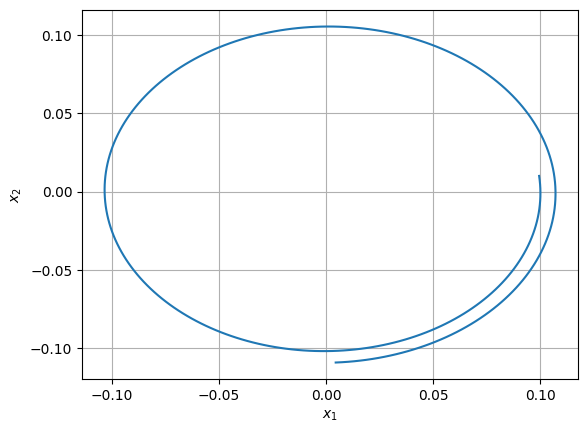

In [ ]:
r, theta = sol_lim.y[0], sol_lim.y[1]
x1, x2 = convert_x1_x2(r,theta)

plt.plot(x1,x2)
plt.grid(True)
plt.xlabel('$x_{1}$')
plt.ylabel('$x_{2}$')
plt.show()

Quando temos $\beta = 0$, a trajetória no plano $x_{1}$ e $x_{2}$, vira uma trajetória circular

- Quantos diferentes casos pode distinguir?

4.2) Considere os casos $ \beta >0 $ e $\beta <0 $ .


In [ ]:
args_beta_pos = [0.1, a, omega, b]
args_beta_neg = [-0.1, a, omega, b]

sol_beta_pos = solve_ivp(der_lim, [t0,tf], y_init, t_eval = ts, dense_output = True, args = [args_beta_pos])
sol_beta_neg = solve_ivp(der_lim, [t0,tf], y_init, t_eval = ts, dense_output = True, args = [args_beta_neg])

r_pos, theta_pos, r_neg, theta_neg = sol_beta_pos.y[0], sol_beta_pos.y[1], sol_beta_neg.y[0], sol_beta_neg.y[1]
x1_pos, x2_pos = convert_x1_x2(r_pos,theta_pos)
x1_neg, x2_neg = convert_x1_x2(r_neg, theta_neg)


- Como classifica o comportamento das trajetórias ?

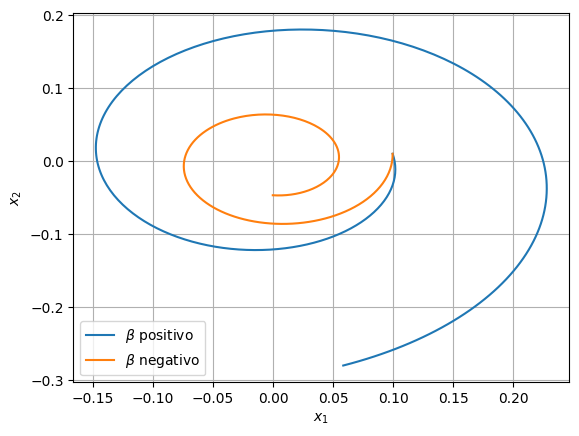

In [ ]:
plt.plot(x1_pos,x2_pos)
plt.plot(x1_neg,x2_neg)
plt.legend(['$\\beta$ positivo','$\\beta$ negativo'])
plt.grid(True)
plt.xlabel('$x_{1}$')
plt.ylabel('$x_{2}$')
plt.show()